In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import matplotlib

In [2]:
df= pd.read_csv("/Users/ishaanbuch/Desktop/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2740,2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600
2741,2021-05-19,552.549988,566.210022,546.979980,563.460022,563.460022,39578400
2742,2021-05-20,575.000000,588.849976,571.070007,586.780029,586.780029,30821100
2743,2021-05-21,596.109985,596.679993,580.000000,580.880005,580.880005,25943600


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2.745000e+03
mean,84.402216,86.263107,82.355499,84.431557,84.431557,3.186471e+07
std,154.086901,157.651566,149.912111,154.100734,154.100734,2.885996e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.780000,7.888000,7.692000,7.820000,7.820000,1.185750e+07
50%,45.271999,45.928001,44.389999,45.122002,45.122002,2.539140e+07
75%,62.757999,63.646000,61.742001,62.813999,62.813999,4.102600e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df['Date']= pd.to_datetime(df['Date'])

In [7]:
print(df.Date.dtype)

datetime64[ns]


In [8]:
df = df.set_index("Date")

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
print(df.shape)

(2745, 6)


In [11]:
tesla_data = df.asfreq('b')

In [12]:
print(tesla_data.shape)

(2845, 6)


In [13]:
tesla_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600.0
2021-05-19,552.549988,566.210022,546.979980,563.460022,563.460022,39578400.0
2021-05-20,575.000000,588.849976,571.070007,586.780029,586.780029,30821100.0
2021-05-21,596.109985,596.679993,580.000000,580.880005,580.880005,25943600.0
2021-05-24,581.599976,614.479980,573.650024,606.440002,606.440002,34558089.0


In [14]:
tesla_data.isnull().sum()

Open         100
High         100
Low          100
Close        100
Adj Close    100
Volume       100
dtype: int64

In [15]:
null_data=tesla_data[tesla_data.isnull().any(axis=1)]

In [16]:
null_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-25,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-24,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-17,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
null_dates=null_data.index.to_list()

In [18]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2017-04-14 00:00:00'), Timestamp('2018-03-30 00:00:00'), Timestamp('2018-12-05 00:00:00'), Timestamp('2019-04-19 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2021-04-02 00:00:00')]


In [19]:
print(tesla_data.shape)

(2845, 6)


In [20]:
modified_df=tesla_data.drop(holidays)
modified_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500.0
...,...,...,...,...,...,...
2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600.0
2021-05-19,552.549988,566.210022,546.979980,563.460022,563.460022,39578400.0
2021-05-20,575.000000,588.849976,571.070007,586.780029,586.780029,30821100.0


In [21]:
print(modified_df.shape)

(2753, 6)


In [22]:
print("Before filling missing values:\n", modified_df.isna().sum())

Before filling missing values:
 Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64


In [23]:
modified_df = modified_df.bfill(axis ='rows')

In [24]:
print("After filling missing values:\n",modified_df.isna().sum())

After filling missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


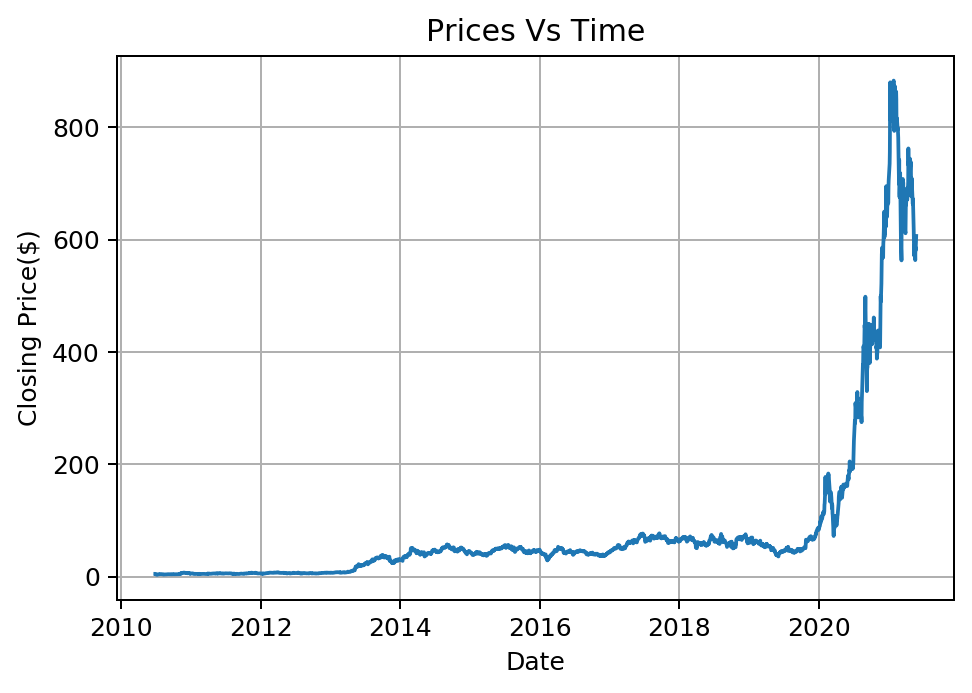

In [25]:
plt.figure(figsize=(6, 4), dpi=180)
plt.xlabel("Date")
plt.ylabel("Closing Price($)")
plt.grid(True)
plt.title('Prices Vs Time')
plt.plot(df['Close'])
plt.show()

In [26]:
closing_stock = df['Close']
closing_stock = closing_stock.astype('float32')
closing_stock = closing_stock.values.reshape(-1, 1)

In [27]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 2196 Validation Samples: 274 Test Samples: 275


In [28]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(2196, 1)


In [29]:
val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(274, 1)


In [30]:
end = None
test_data = closing_stock[n_train+n_val:end]
print(test_data.shape)

(275, 1)


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler =  MinMaxScaler(feature_range=(0, 1))

In [33]:
train = scaler.fit_transform(train_data)

In [34]:
val = scaler.transform(val_data)

In [35]:
test = scaler.transform(test_data)

In [36]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
n_features = 2

In [38]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [39]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(2193, 2) (2193,) (271, 2) (271,) (272, 2) (272,)


In [40]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [41]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(2193, 1, 2) (2193,) (271, 1, 2) (271,) (272, 1, 2) (272,)


In [42]:
!pip install astunparse
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [43]:
model = keras.Sequential()

In [44]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [45]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [46]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [47]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Epoch 1/100
18/18 [==============================] - 5s 81ms/step - loss: 0.2118 - mean_squared_error: 0.2118 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 7/100
18/18 [==============

18/18 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 55/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 57/100
18/18 [=====================

In [48]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00033 , RMSE: 0.02
Validation Score:
MSE: 0.01349 , RMSE: 0.12
Test Score:
MSE: 28.78039 , RMSE: 5.36
